In [1]:
# prompt: uninstal nltk and install version 3.8.0
!pip uninstall nltk
!pip install nltk==3.8.0
!pip install textblob
!pip install wordcloud
!pip install keras

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Would remove:
    /usr/local/bin/nltk
    /usr/local/lib/python3.11/dist-packages/nltk-3.9.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/nltk/*
Proceed (Y/n)? y
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textblob 0.19.0 requires nltk>=3.9, but you have nltk 3.8 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8
    Uninstalling nltk-3.8:
      Successfully uninstalled nltk-3.8


# NLP using Python

In [2]:
import string
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,LancasterStemmer,WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import pos_tag
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



## Question 1

1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports, technology, food, books, etc.).  


In [3]:
paragraph='''
Obito Uchiha, a character from the Naruto series, is one of the most complex and tragic figures in the story.
Once a cheerful and optimistic ninja, Obito's life took a dark turn after a mission went horribly wrong, leaving him presumed dead.
Rescued by Madara Uchiha, he was manipulated into adopting a nihilistic worldview and became a key figure in the Akatsuki organization.
Obito's ultimate goal was to create an ideal world through the Infinite Tsukuyomi, a plan that involved casting the entire world into a genjutsu.
Despite his descent into darkness, Obito's character arc is one of redemption, as he ultimately sacrifices himself to protect his friends and atone for his past actions.
His story serves as a powerful exploration of loss, identity, and the possibility of redemption even in the face of overwhelming despair.
'''
paragraph

"\nObito Uchiha, a character from the Naruto series, is one of the most complex and tragic figures in the story.\nOnce a cheerful and optimistic ninja, Obito's life took a dark turn after a mission went horribly wrong, leaving him presumed dead.\nRescued by Madara Uchiha, he was manipulated into adopting a nihilistic worldview and became a key figure in the Akatsuki organization.\nObito's ultimate goal was to create an ideal world through the Infinite Tsukuyomi, a plan that involved casting the entire world into a genjutsu.\nDespite his descent into darkness, Obito's character arc is one of redemption, as he ultimately sacrifices himself to protect his friends and atone for his past actions.\nHis story serves as a powerful exploration of loss, identity, and the possibility of redemption even in the face of overwhelming despair.\n"

2. Convert text to lowercase and remove punctuation.  


In [4]:
paragraph=paragraph.lower()
paragraph=paragraph.translate(str.maketrans('', '', string.punctuation))
paragraph

'\nobito uchiha a character from the naruto series is one of the most complex and tragic figures in the story\nonce a cheerful and optimistic ninja obitos life took a dark turn after a mission went horribly wrong leaving him presumed dead\nrescued by madara uchiha he was manipulated into adopting a nihilistic worldview and became a key figure in the akatsuki organization\nobitos ultimate goal was to create an ideal world through the infinite tsukuyomi a plan that involved casting the entire world into a genjutsu\ndespite his descent into darkness obitos character arc is one of redemption as he ultimately sacrifices himself to protect his friends and atone for his past actions\nhis story serves as a powerful exploration of loss identity and the possibility of redemption even in the face of overwhelming despair\n'

3. Tokenize the text into words and sentences.  


In [5]:
words=word_tokenize(paragraph)
sentences=sent_tokenize(paragraph)
len(words), len(sentences)

(136, 1)

4. Remove stopwords (using NLTK's stopwords list).  


In [6]:
stop_words=set(stopwords.words('english'))
filtered_words=[word for word in words if word not in stop_words]
len(filtered_words)

78

5. Display word frequency distribution (excluding stopwords).  


In [7]:
import pandas as pd
df=pd.DataFrame(filtered_words, columns=['word'])
df.value_counts().reset_index(name='count').rename(columns={'index':'word'}).sort_values(by='count', ascending=False).head(10)

,word,count
0,obitos,3
1,uchiha,2
2,redemption,2
3,world,2
4,character,2
5,story,2
6,one,2
7,atone,1
8,became,1
9,akatsuki,1


# Question 2

1. Take the tokenized words from Ques on 1 (after stopword removal).
2. remove stop words

In [8]:
filtered_words=list(set(filtered_words))

3. Perform stemming with PorterStemmer

In [9]:
stemmer=PorterStemmer()
stemmed_words=[stemmer.stem(word) for word in filtered_words]

In [10]:
lancaster_stemmer=LancasterStemmer()
lancaster_words=[lancaster_stemmer.stem(word) for word in filtered_words]

4. Apply lemmatization using NLTK's  WordNetLemmatizer .


In [11]:
wordnet_lemmatizer=WordNetLemmatizer()
wordnet_words=[wordnet_lemmatizer.lemmatize(word) for word in filtered_words]

5. Compare the stemmed and lemma zed outputs and explain when you’d prefer one over
the other.

In [12]:
df=pd.DataFrame({'original':filtered_words, 'stemmed':stemmed_words, 'lancaster':lancaster_words, 'lemmatized':wordnet_words})
df

,original,stemmed,lancaster,lemmatized
0,descent,descent,desc,descent
1,obitos,obito,obito,obitos
2,darkness,dark,dark,darkness
3,despite,despit,despit,despite
4,mission,mission,miss,mission
...,...,...,...,...
65,series,seri,sery,series
66,possibility,possibl,poss,possibility
67,redemption,redempt,redempt,redemption
68,optimistic,optimist,optim,optimistic


# Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).


1. Use CountVectorizer to generate the Bag of Words representa on.


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the filtered words into Bag of Words representation
bow_matrix = vectorizer.fit_transform([' '.join(filtered_words)])

# Convert the matrix to a DataFrame for better visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
bow_df


,actions,adopting,akatsuki,arc,atone,became,casting,character,cheerful,complex,...,tragic,tsukuyomi,turn,uchiha,ultimate,ultimately,went,world,worldview,wrong
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


2. Use TfidfVectorizer to compute TF-IDF scores.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the filtered words into TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(filtered_words)])

# Convert the matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,actions,adopting,akatsuki,arc,atone,became,casting,character,cheerful,complex,...,tragic,tsukuyomi,turn,uchiha,ultimate,ultimately,went,world,worldview,wrong
0,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523,...,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523,0.119523


3. Print and interpret the top 3 keywords from each text using TF-IDF.```


In [15]:
# Extract the top 3 keywords for each text based on TF-IDF scores
top_keywords = tfidf_df.T.nlargest(3, 0).reset_index()
top_keywords.columns = ['Keyword', 'TF-IDF Score']
top_keywords

,Keyword,TF-IDF Score
0,actions,0.119523
1,adopting,0.119523
2,akatsuki,0.119523


# Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs Blockchain).


1. Preprocess and tokenize both texts.


In [16]:
# Text 1: Artificial Intelligence (AI)
text_ai = """
Artificial Intelligence (AI) is a branch of computer science that focuses on creating systems capable of performing tasks that typically require human intelligence.
These tasks include natural language processing, image recognition, decision-making, and problem-solving.
AI is widely used in applications such as virtual assistants, autonomous vehicles, and predictive analytics.
It leverages machine learning and deep learning techniques to improve its performance over time.
"""

# Text 2: Blockchain
text_blockchain = """
Blockchain is a decentralized and distributed ledger technology that ensures secure and transparent record-keeping.
It operates through a network of nodes that validate and store transactions in blocks, which are linked together in a chain.
Blockchain is the backbone of cryptocurrencies like Bitcoin and Ethereum, but its applications extend to supply chain management, healthcare, and voting systems.
Its immutability and transparency make it a revolutionary technology for trust-based systems.
"""

2. Calculate:

In [17]:
# Preprocessing and tokenizing Text 1 (AI)
text_ai_cleaned = text_ai.lower().translate(str.maketrans('', '', string.punctuation))
text_ai_tokens = word_tokenize(text_ai_cleaned)

# Preprocessing and tokenizing Text 2 (Blockchain)
text_blockchain_cleaned = text_blockchain.lower().translate(str.maketrans('', '', string.punctuation))
text_blockchain_tokens = word_tokenize(text_blockchain_cleaned)

text_ai_tokens, text_blockchain_tokens

(['artificial',
  'intelligence',
  'ai',
  'is',
  'a',
  'branch',
  'of',
  'computer',
  'science',
  'that',
  'focuses',
  'on',
  'creating',
  'systems',
  'capable',
  'of',
  'performing',
  'tasks',
  'that',
  'typically',
  'require',
  'human',
  'intelligence',
  'these',
  'tasks',
  'include',
  'natural',
  'language',
  'processing',
  'image',
  'recognition',
  'decisionmaking',
  'and',
  'problemsolving',
  'ai',
  'is',
  'widely',
  'used',
  'in',
  'applications',
  'such',
  'as',
  'virtual',
  'assistants',
  'autonomous',
  'vehicles',
  'and',
  'predictive',
  'analytics',
  'it',
  'leverages',
  'machine',
  'learning',
  'and',
  'deep',
  'learning',
  'techniques',
  'to',
  'improve',
  'its',
  'performance',
  'over',
  'time'],
 ['blockchain',
  'is',
  'a',
  'decentralized',
  'and',
  'distributed',
  'ledger',
  'technology',
  'that',
  'ensures',
  'secure',
  'and',
  'transparent',
  'recordkeeping',
  'it',
  'operates',
  'through',
 


a. Jaccard Similarity using sets

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# a. Jaccard Similarity using sets
set_ai = set(text_ai_tokens)
set_blockchain = set(text_blockchain_tokens)
jaccard_similarity = len(set_ai.intersection(set_blockchain)) / len(set_ai.union(set_blockchain))
f"Jaccard Similarity: {jaccard_similarity}"




'Jaccard Similarity: 0.11702127659574468'


b. Cosine Similarity using TfidfVectorizer + cosine_similarity()

In [19]:
# b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
tfidf_matrix_tech = tfidf_vectorizer.fit_transform([text_ai_cleaned, text_blockchain_cleaned])
cosine_sim = cosine_similarity(tfidf_matrix_tech[0:1], tfidf_matrix_tech[1:2])
print(f"Cosine Similarity: {cosine_sim[0][0]}")


Cosine Similarity: 0.2691815582148356


c. Analyze which similarity metric gives be er insights in your case.


In [20]:
# c. Analysis
print('''Jaccard Similarity focuses on the overlap of unique tokens, while Cosine Similarity considers the frequency and importance of terms.
In this case, Cosine Similarity provides better insights as it captures the importance of terms using TF-IDF weights.''')

Jaccard Similarity focuses on the overlap of unique tokens, while Cosine Similarity considers the frequency and importance of terms.
In this case, Cosine Similarity provides better insights as it captures the importance of terms using TF-IDF weights.


# Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjec vity for each review.
2. Classify reviews into Posi ve / Nega ve / Neutral.
3. Create a word cloud using the wordcloud library for all posi ve reviews.

                                              Review  Polarity  Subjectivity  \
0  The product is amazing! It exceeded my expecta...     0.875         0.950   
1  The service was okay, but it could have been b...     0.500         0.500   
2  I am very disappointed with the product. It br...    -0.975         0.975   

  Sentiment  
0  Positive  
1  Positive  
2  Negative  


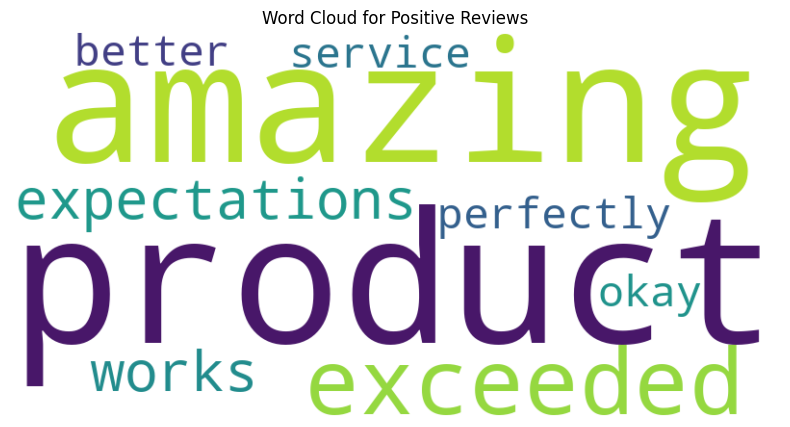

In [21]:
from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Step 1: Write a short review
reviews = [
    "The product is amazing! It exceeded my expectations and works perfectly.",
    "The service was okay, but it could have been better.",
    "I am very disappointed with the product. It broke after one use."
]

# Step 2: Analyze polarity and subjectivity
review_analysis = []
for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
    review_analysis.append((review, polarity, subjectivity, sentiment))

# Convert analysis to DataFrame for better visualization
review_df = pd.DataFrame(review_analysis, columns=["Review", "Polarity", "Subjectivity", "Sentiment"])
print(review_df)

# Step 3: Create a word cloud for positive reviews
positive_reviews = " ".join(review_df[review_df["Sentiment"] == "Positive"]["Review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text star ng from any seed word you
provide.```

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

# Step 1: Choose a paragraph as training data
training_text = """
Artificial Intelligence (AI) is transforming the world. It powers applications like virtual assistants, autonomous vehicles, and predictive analytics.
AI leverages machine learning and deep learning to solve complex problems. The technology is evolving rapidly, enabling breakthroughs in healthcare, finance, and education.
"""

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([training_text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in training_text.split("\n"):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Split data into predictors and label
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = np.array(y)

# Step 2: Build a simple LSTM model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 3: Train the model
model.fit(X, y, epochs=100, verbose=1)

# Generate new text
seed_text = "AI is"
next_words = 10

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == np.argmax(predicted):
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.0000e+00 - loss: 3.5842
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0171 - loss: 3.5811     
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0550 - loss: 3.5790
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0550 - loss: 3.5769
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0550 - loss: 3.5744 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0446 - loss: 3.5723
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0721 - loss: 3.5685
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0825 - loss: 3.5631
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0617 - loss: 3.5584 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0721 - loss: 3.5505
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0721 - loss: 3.5369 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0550 - lo